In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
from scipy.spatial.kdtree import KDTree as kd
import json
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [2]:
#this is borrowed from https://github.com/davideverona/deep-crowd-counting_crowdnet
def gaussian_filter_density(gt):
    print (gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    #pts = np.array(zip(np.nonzero(gt)[1], np.nonzero(gt)[0]))
    pts = np.column_stack((np.nonzero(gt)[1],np.nonzero(gt)[0]))
    leafsize = 2048
    # build kdtree
    #tree = scipy.spatial.kdtree(pts.copy(), leafsize=leafsize)
    tree = kd(pts.copy(), leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print ('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print ('done.')
    return density

In [3]:
#set the root to the Shanghai dataset you download
root = '/Users/G4400/Desktop/Shanghai/'

In [4]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_train,part_A_test]

In [5]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [6]:
scipy.__version__

'1.5.2'

In [7]:
h5py.__version__

'2.10.0'

In [8]:
for img_path in img_paths:
    print (img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    print (mat.keys()) 
    #print ("dtype mat",teststruct.dtype)
    img= plt.imread(img_path)
    print(img)    
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    print ('image info',gt)
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    print('matrix (k)',k)

/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_1.jpg
dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[255 254 255]
  [251 250 255]
  [252 251 255]
  ...
  [233 237 240]
  [236 237 241]
  [237 238 240]]

 [[252 251 255]
  [253 252 255]
  [250 249 254]
  ...
  [240 244 247]
  [230 231 235]
  [220 221 223]]

 [[250 249 254]
  [255 254 255]
  [255 254 255]
  ...
  [221 225 228]
  [225 226 230]
  [230 231 233]]

 ...

 [[242 171 201]
  [240 169 199]
  [238 167 197]
  ...
  [206 180 167]
  [205 179 166]
  [204 178 165]]

 [[241 168 198]
  [239 166 196]
  [237 164 194]
  ...
  [210 184 169]
  [209 183 168]
  [208 182 167]]

 [[238 165 195]
  [237 164 194]
  [234 161 191]
  ...
  [213 187 172]
  [212 186 171]
  [211 185 170]]]
image info [[ 29.6225116  472.92022152]
 [ 54.35533603 454.96602305]
 [ 51.79045053 460.46220626]
 ...
 [597.89732076 688.27900015]
 [965.77518336 638.44693908]
 [166.9965574  628.1873971 ]]
matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [

 [665.60989011  15.84065934]]
matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_106.jpg
dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[100  88  75 ... 108 135 158]
 [ 91  70  52 ...  87 135 175]
 [ 69  58  51 ...  88 137 174]
 ...
 [125 114 112 ... 130 132 132]
 [126 116 115 ... 130 131 132]
 [127 118 118 ... 129 131 131]]
image info [[168.72571331 640.92941205]
 [ 77.68075827 637.86048098]
 [ 32.66976926 641.95238907]
 ...
 [547.22721181 462.93141005]
 [975.85458444 461.39694452]
 [949.25718184 203.60673473]]
matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_107.jpg
dict_keys(['__header__', '__version__

dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[ 84  90 104]
  [ 86  92 106]
  [ 76  77  95]
  ...
  [  7   1  13]
  [  0   0  11]
  [ 53  55  67]]

 [[ 70  76  90]
  [ 78  84  98]
  [ 81  83  98]
  ...
  [  4   1  12]
  [  0   0  11]
  [119 121 133]]

 [[ 76  82  94]
  [ 81  87  99]
  [ 71  73  86]
  ...
  [ 10   7  18]
  [ 42  42  52]
  [158 162 171]]

 ...

 [[  8  27  25]
  [  0  19  17]
  [  0  13  11]
  ...
  [  4   2   7]
  [  6   3  10]
  [  8   6  11]]

 [[  6  18  18]
  [  0   9   9]
  [  0   6   6]
  ...
  [ 12   9  16]
  [ 15  12  21]
  [ 17  14  21]]

 [[  7  17  18]
  [  0   9  10]
  [  0   3   4]
  ...
  [ 62  59  68]
  [ 65  62  71]
  [ 68  65  74]]]
image info [[ 35.05657492 349.62844037]
 [ 30.16360856 330.05657492]
 [ 14.26146789 319.04740061]
 ...
 [196.2042957    6.08941059]
 [374.22627373 255.98701299]
 [376.32417582 272.17082917]]
matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 

dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[ 51  58  68]
  [ 56  65  74]
  [ 66  74  85]
  ...
  [250 252 251]
  [250 252 251]
  [250 252 251]]

 [[ 56  60  71]
  [ 58  65  75]
  [ 66  75  84]
  ...
  [250 252 251]
  [250 252 251]
  [250 252 251]]

 [[ 57  60  69]
  [ 58  62  71]
  [ 62  69  77]
  ...
  [250 252 251]
  [250 252 251]
  [250 252 251]]

 ...

 [[ 53  39  28]
  [ 35  23  11]
  [ 55  42  33]
  ...
  [  9   9   9]
  [  7   7   9]
  [  5   5   7]]

 [[ 48  44  33]
  [ 36  34  22]
  [ 65  62  53]
  ...
  [  8   8  10]
  [  7   6  11]
  [  6   7  11]]

 [[ 40  42  31]
  [ 54  56  45]
  [ 96  97  89]
  ...
  [  6   6   8]
  [  7   8  12]
  [  9  10  14]]]
image info [[ 57.83049172 581.2483321 ]
 [  7.35161848 566.82579689]
 [ 92.68495182 580.04645416]
 ...
 [928.84186858 293.80645543]
 [923.98520754 296.39667465]
 [916.86210467 295.74911985]]
matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 

image info [[464.92813853 360.82424242]
 [473.1012987  313.58614719]
 [462.43463203 310.53852814]
 ...
 [782.15037949 452.6369146 ]
 [958.91948052 624.78961039]
 [873.41565102 594.31341991]]
matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_129.jpg
dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[170 158 146]
  [177 165 153]
  [173 159 148]
  ...
  [171 184 201]
  [170 183 199]
  [163 176 192]]

 [[155 142 133]
  [163 150 141]
  [153 140 131]
  ...
  [154 168 181]
  [167 181 192]
  [173 187 198]]

 [[133 123 114]
  [134 124 115]
  [130 120 111]
  ...
  [158 173 176]
  [166 181 184]
  [174 189 192]]

 ...

 [[ 19  17  20]
  [ 22  20  21]
  [ 24  23  21]
  ...
  [ 20  20  20]
  [ 21  21  21]
  [ 20  20  20]]

 [[ 12  12  12]
  [ 20  20  20]
  [ 28  28  26]
  ...
  [ 19  19  19]
  [ 20 

matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_135.jpg
dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[  0   1   0]
  [  0   1   0]
  [  0   2   0]
  ...
  [ 14   1   0]
  [ 26  14   0]
  [  7   0   0]]

 [[  0   2   0]
  [  2   4   0]
  [  5   7   2]
  ...
  [104  88  36]
  [ 33  21   0]
  [ 21  11   0]]

 [[  3   5   0]
  [  5   7   2]
  [  8   9   4]
  ...
  [173 155  81]
  [ 67  53   8]
  [ 13   0   0]]

 ...

 [[  7   5   0]
  [  7   7   0]
  [  8   7   3]
  ...
  [ 28  23   3]
  [  6   0   0]
  [ 10   6   0]]

 [[  5   5   0]
  [  5   6   0]
  [  7   8   3]
  ...
  [  9   4   0]
  [ 10   4   0]
  [ 10   6   0]]

 [[  1   2   0]
  [  2   3   0]
  [  2   4   0]
  ...
  [  6   1   0]
  [ 18  12   0]
  [  9   5   0]]]
image info [[ 11.1993007   48.49300699]
 [  9.1013986   57.7

[[[ 72  45   0]
  [ 74  50   2]
  [ 81  57  13]
  ...
  [ 39   9   0]
  [ 52  18   0]
  [ 65  31   4]]

 [[ 79  51   4]
  [ 85  58  11]
  [ 94  70  24]
  ...
  [ 50  20   0]
  [ 58  27   0]
  [ 69  38  10]]

 [[ 91  60  13]
  [100  72  25]
  [113  86  41]
  ...
  [ 65  38  11]
  [ 66  39  10]
  [ 75  46  16]]

 ...

 [[  4  42  53]
  [  3  40  49]
  [  9  39  47]
  ...
  [ 55  15   3]
  [ 77  31  15]
  [ 95  47  27]]

 [[  1  41  53]
  [  0  37  46]
  [  7  36  42]
  ...
  [ 53  11   0]
  [ 78  31  13]
  [ 97  49  27]]

 [[  1  40  55]
  [  0  35  44]
  [  4  31  38]
  ...
  [ 55  13   0]
  [ 82  35  15]
  [105  55  32]]]
image info [[  14.75688073 1975.83944954]
 [  75.85779817 1503.32568807]
 [ 829.43577982 1499.25229358]
 ...
 [  13.60689311  101.47252747]
 [  23.83666334  105.94805195]
 [ 170.88961039  109.78421578]]
matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


image info [[ 58.49215386 664.14725028]
 [ 21.25579023 644.96488113]
 [ 43.82328334 641.57975717]
 ...
 [ 59.55930489 344.50102983]
 [ 18.12873546 353.19633453]
 [ 16.85001418 354.21931155]]
matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_15.jpg
dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[ 49  29  38]
  [ 46  29  37]
  [ 43  28  33]
  ...
  [150 102 102]
  [149 101 101]
  [146 100 100]]

 [[ 48  31  39]
  [ 47  30  38]
  [ 45  30  35]
  ...
  [150 102 102]
  [146 100 100]
  [144 100  99]]

 [[ 47  32  39]
  [ 48  33  40]
  [ 46  34  38]
  ...
  [150 101 104]
  [145 101 102]
  [142 100 101]]

 ...

 [[239 210 168]
  [232 208 164]
  [228 209 166]
  ...
  [ 41  55  68]
  [ 39  53  66]
  [ 41  55  68]]

 [[234 206 159]
  [242 214 167]
  [241 214 169]
  ...
  [ 39  53  66]
  [ 41  

matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_156.jpg
dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[ 46  48  43]
  [ 62  58  49]
  [104  87  69]
  ...
  [ 78  77  47]
  [ 53  52  22]
  [ 35  34   4]]

 [[ 36  38  33]
  [ 51  48  39]
  [ 90  74  58]
  ...
  [ 22  22   0]
  [ 20  20   0]
  [ 26  26   2]]

 [[ 33  38  34]
  [ 44  44  36]
  [ 72  59  43]
  ...
  [  7   7   0]
  [ 11  11   1]
  [ 12  12   2]]

 ...

 [[ 60  64  37]
  [ 77  83  57]
  [ 79  84  61]
  ...
  [170 164 142]
  [164 158 136]
  [148 142 120]]

 [[ 32  37  14]
  [ 43  48  25]
  [ 43  51  28]
  ...
  [169 163 141]
  [164 158 136]
  [150 144 122]]

 [[ 34  37  26]
  [ 40  43  32]
  [ 38  44  30]
  ...
  [158 150 131]
  [158 150 131]
  [145 137 118]]]
image info [[  7.2529976    3.06814548]
 [ 30.17226219  10.8

matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_164.jpg
dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[184 179 175]
  [191 186 182]
  [193 188 184]
  ...
  [ 11   9  12]
  [  5   3   6]
  [  5   3   6]]

 [[103  98  94]
  [112 107 103]
  [120 115 111]
  ...
  [  5   3   6]
  [  5   3   6]
  [  5   3   6]]

 [[ 17  10   4]
  [ 24  17  11]
  [ 29  22  16]
  ...
  [  4   2   3]
  [  5   3   4]
  [  5   3   4]]

 ...

 [[170 161 156]
  [169 160 155]
  [168 159 154]
  ...
  [  4   0   0]
  [  7   3   0]
  [  7   3   0]]

 [[162 153 148]
  [161 152 147]
  [160 151 146]
  ...
  [  4   0   0]
  [ 11   7   4]
  [ 11   7   4]]

 [[156 147 142]
  [154 145 140]
  [153 144 139]
  ...
  [  7   2   0]
  [ 13   9   6]
  [ 13   9   6]]]
image info [[282.72222222  68.65925926]
 [291.27777778  67.5

[[[  3  17  18]
  [  5  19  20]
  [ 11  25  28]
  ...
  [241 252 248]
  [241 252 248]
  [241 252 248]]

 [[  0  14  15]
  [  3  17  18]
  [ 10  24  27]
  ...
  [241 252 248]
  [241 252 248]
  [241 252 248]]

 [[  0  11  13]
  [  3  14  16]
  [  7  21  22]
  ...
  [241 252 248]
  [241 252 248]
  [241 252 248]]

 ...

 [[  0   6   9]
  [  1   9  12]
  [  4  12  15]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[  0   8  11]
  [  4  12  15]
  [  8  16  19]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[  1  10  15]
  [  5  14  19]
  [  9  18  23]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]]
image info [[ 514.33039849  509.21636586]
 [ 474.43429459  443.74583639]
 [ 480.57215673  383.39019203]
 [ 398.73399489  408.9646176 ]
 [ 318.9417871   355.76981241]
 [ 351.67705184  355.76981241]
 [ 288.25247641  420.21736486]
 [ 261.65507382  397.71187035]
 [ 245.28744145  471.36621601]
 [ 251.42530359  596.16941281]
 [ 158.33439449  480.57300921]
 [ 211.52919969  4

image info [[ 102.29764706  424.15176471]
 [  17.96823529  388.01058824]
 [ 510.69294118  485.59176471]
 [ 680.55647059  587.99176471]
 [ 643.21058824  478.36352941]
 [ 796.20823529  375.96352941]
 [ 886.56117647  586.78705882]
 [1009.44117647  353.07411765]
 [  35.73764706  299.46470588]
 [  62.84352941  246.45764706]
 [  25.49764706  243.44588235]
 [  68.86705882  297.65764706]
 [ 221.26235294  271.15411765]
 [ 391.12588235  293.44117647]
 [ 351.37058824  309.70470588]
 [ 497.74235294  275.97294118]
 [ 388.71647059  236.21764706]
 [  39.35176471  206.70235294]
 [  82.72117647  177.78941176]
 [  70.07176471  194.05294118]
 [ 100.18941176  177.78941176]
 [ 118.86235294  204.89529412]
 [ 149.58235294  225.97764706]
 [ 163.43647059  198.26941176]
 [ 241.74235294  217.54470588]
 [ 259.81294118  189.23411765]
 [ 242.94705882  164.53764706]
 [ 186.32588235  170.56117647]
 [ 213.43176471  175.38      ]
 [ 220.66        162.73058824]
 [ 162.83411765  150.08117647]
 [ 189.33764706  145.8647058

dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[ 82  76  60]
  [ 85  82  63]
  [ 96 100  75]
  ...
  [102  79  71]
  [ 91  69  56]
  [ 80  56  44]]

 [[ 69  61  48]
  [ 80  75  56]
  [ 99  98  77]
  ...
  [ 80  61  54]
  [ 72  54  44]
  [ 63  43  32]]

 [[ 71  61  51]
  [ 90  81  66]
  [117 112  93]
  ...
  [ 62  51  49]
  [ 58  44  41]
  [ 57  42  37]]

 ...

 [[ 47  30  38]
  [ 44  27  33]
  [ 40  26  26]
  ...
  [ 31  19  29]
  [ 43  33  44]
  [ 54  43  60]]

 [[ 41  13  25]
  [ 42  15  24]
  [ 44  19  23]
  ...
  [ 31  18  27]
  [ 39  27  37]
  [ 46  32  49]]

 [[ 55  21  35]
  [ 51  19  30]
  [ 49  18  26]
  ...
  [ 33  18  25]
  [ 39  26  36]
  [ 45  28  44]]]
image info [[108.03153745 766.33442838]
 [ 35.49540079 734.79697766]
 [ 12.36793693 707.46452037]
 ...
 [572.30978975  24.94152431]
 [573.88666229  32.82588699]
 [551.2848226   16.53153745]]
matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 

[[[121 123 122]
  [121 123 122]
  [121 123 122]
  ...
  [172 172 172]
  [116 116 116]
  [ 70  70  70]]

 [[123 125 124]
  [123 125 124]
  [123 125 124]
  ...
  [215 215 215]
  [183 183 183]
  [129 129 129]]

 [[125 127 126]
  [125 127 126]
  [125 127 126]
  ...
  [236 236 236]
  [220 220 220]
  [178 178 178]]

 ...

 [[ 85  85  85]
  [101 101 101]
  [100 100 100]
  ...
  [208 208 208]
  [207 207 207]
  [206 206 206]]

 [[ 87  87  87]
  [ 92  92  92]
  [ 95  95  95]
  ...
  [208 208 208]
  [207 207 207]
  [206 206 206]]

 [[ 91  91  91]
  [ 96  96  96]
  [ 99  99  99]
  ...
  [208 208 208]
  [205 205 205]
  [203 203 203]]]
image info [[191.46078431 492.29411765]
 [135.99019608 491.84313725]
 [ 98.10784314 487.78431373]
 [ 41.73529412 495.90196078]
 [429.12745098 468.39215686]
 [163.5        424.64705882]
 [126.06862745 402.54901961]
 [ 60.2254902  422.84313725]
 [ 89.53921569 361.96078431]
 [196.87254902 383.60784314]
 [227.53921569 386.31372549]
 [186.5        415.62745098]
 [273.99019

image info [[ 128.31455837  644.59668508]
 [ 644.96634857  646.82844228]
 [ 781.10353735  557.55815455]
 [ 974.15053455  467.17198823]
 [ 796.7258377   514.03888929]
 [ 820.15928823  394.63987946]
 [ 948.48532683  357.81588577]
 [1007.62689244  312.06486331]
 [ 862.56267489  306.48547033]
 [ 695.18088541  371.20642893]
 [ 730.8890005   365.62703595]
 [ 649.42986295  392.40812226]
 [ 513.29267418  461.59259525]
 [ 323.59331276  511.80713209]
 [ 216.4689675   483.91016718]
 [ 352.60615627  423.65272297]
 [ 143.93685872  396.87163665]
 [  17.84257731  415.84157279]
 [  12.26318433  352.23649279]
 [  93.72232188  289.74729138]
 [ 445.22407979  382.3652149 ]
 [ 502.13388821  344.42534261]
 [ 552.34842506  406.91454402]
 [ 584.70890436  339.96182823]
 [ 632.69168401  310.94898472]
 [ 670.63155629  293.09492717]
 [ 707.45554997  318.76013489]
 [ 779.98765875  304.25371314]
 [ 923.9359977   288.63141279]
 [ 959.64411279  284.1678984 ]
 [ 464.19401593  304.25371314]
 [ 448.57171558  329.9189208

  [ 19  14  11]]]
image info [[ 15.11038961 357.86363636]
 [ 37.83766234 324.0974026 ]
 [ 16.40909091 272.14935065]
 [ 69.65584416 248.12337662]
 [ 31.99350649 225.3961039 ]
 [ 41.08441558 187.73376623]
 [ 15.75974026 181.24025974]
 [  9.91558442 162.40909091]
 [ 29.3961039  133.83766234]
 [ 42.38311688 120.85064935]
 [ 15.11038961 129.29220779]
 [  5.37012987 132.53896104]
 [ 57.96753247 132.53896104]
 [ 86.53896104 139.68181818]
 [ 89.13636364 168.9025974 ]
 [ 60.56493506 177.99350649]
 [ 79.3961039  195.52597403]
 [115.75974026 252.01948052]
 [109.91558442 216.95454545]
 [111.21428571 170.85064935]
 [107.31818182 147.47402597]
 [134.59090909 161.11038961]
 [137.83766234 181.24025974]
 [119.65584416 149.42207792]
 [128.74675325 140.98051948]
 [138.48701299 356.56493506]
 [107.96753247 315.00649351]
 [ 74.2012987  305.26623377]
 [ 72.9025974  331.88961039]
 [152.12337662 274.74675325]
 [148.22727273 417.6038961 ]
 [194.98051948 390.98051948]
 [239.78571429 357.86363636]
 [222.25324675

[[[ 48  49  53]
  [ 55  56  60]
  [ 59  60  64]
  ...
  [162 155 149]
  [163 152 146]
  [157 147 138]]

 [[ 67  68  72]
  [ 52  53  57]
  [ 45  46  50]
  ...
  [152 143 138]
  [145 135 126]
  [141 128 119]]

 [[121 121 123]
  [ 90  90  92]
  [ 56  56  58]
  ...
  [151 138 132]
  [149 135 126]
  [143 129 118]]

 ...

 [[ 26  20  20]
  [ 23  17  17]
  [ 29  23  23]
  ...
  [  3   3   5]
  [  0   1   3]
  [  0   1   3]]

 [[ 22  16  16]
  [ 35  29  29]
  [ 52  46  46]
  ...
  [  7   7   9]
  [  3   4   6]
  [  3   4   6]]

 [[ 38  32  32]
  [ 52  46  46]
  [ 62  56  56]
  ...
  [  1   1   3]
  [  1   2   4]
  [  1   2   4]]]
image info [[165.79338843 215.18732782]
 [ 64.73002755 178.6584022 ]
 [ 31.85399449 226.75482094]
 [ 86.03856749 153.08815427]
 [  1.41322314 151.87052342]
 [  5.0661157  213.96969697]
 [176.14325069 160.39393939]
 [187.7107438  129.34435262]
 [153.00826446 123.86501377]
 [ 90.90909091  28.28099174]
 [ 75.07988981  70.89807163]
 [ 56.815427    89.16253444]
 [ 98.21487

matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_225.jpg
dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[ 67  79  43]
  [ 66  78  42]
  [ 69  80  48]
  ...
  [ 71  55  65]
  [110  96 109]
  [124 110 125]]

 [[ 57  68  34]
  [ 61  72  38]
  [ 71  82  50]
  ...
  [ 92  77  84]
  [120 107 117]
  [121 108 118]]

 [[ 53  64  32]
  [ 55  66  34]
  [ 65  76  46]
  ...
  [110  95  98]
  [124 112 116]
  [116 105 109]]

 ...

 [[ 20  46  73]
  [ 17  43  70]
  [ 16  43  72]
  ...
  [ 45  46  50]
  [ 45  48  55]
  [ 46  49  56]]

 [[ 18  44  71]
  [ 16  42  69]
  [ 15  42  71]
  ...
  [ 46  47  51]
  [ 47  50  57]
  [ 49  52  59]]

 [[ 17  43  70]
  [ 15  41  68]
  [ 14  41  70]
  ...
  [ 46  47  51]
  [ 48  51  58]
  [ 51  54  61]]]
image info [[  63.58069655  475.28357383]
 [ 102.20251103  4

 [572.97752248 272.86463536]]
matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_231.jpg
dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[  0   1   4]
  [  0   3   6]
  [  4   9  13]
  ...
  [  0   0   4]
  [  1   0   5]
  [  3   2   7]]

 [[ 11  16  19]
  [  3   8  11]
  [  0   1   4]
  ...
  [  0   0   4]
  [  3   2   7]
  [  4   5   9]]

 [[  3   9   9]
  [  1   7   7]
  [  0   3   3]
  ...
  [  0   2   3]
  [  3   4   6]
  [  5   9  10]]

 ...

 [[196 203  27]
  [196 203  27]
  [196 203  27]
  ...
  [123  16   0]
  [133  13  14]
  [126   1   9]]

 [[197 206  37]
  [193 202  33]
  [184 193  24]
  ...
  [114  24   0]
  [107   8   3]
  [108   3   7]]

 [[195 206  40]
  [191 202  36]
  [182 193  27]
  ...
  [ 99  18   0]
  [ 92   2   0]
  [ 93   0   0]]]
image info [[  45.75419364   5

[[[178 166 142]
  [182 170 146]
  [188 176 154]
  ...
  [162 164 153]
  [170 172 161]
  [171 173 162]]

 [[180 168 144]
  [184 172 148]
  [189 177 155]
  ...
  [178 180 169]
  [177 179 168]
  [171 173 162]]

 [[182 170 146]
  [186 174 150]
  [190 178 156]
  ...
  [142 143 135]
  [130 131 123]
  [118 119 111]]

 ...

 [[  1  11   0]
  [  6  11   4]
  [ 17  11  11]
  ...
  [107 107 107]
  [ 44  44  44]
  [ 44  44  44]]

 [[  4  14   3]
  [  7  12   5]
  [ 18  12  12]
  ...
  [ 34  34  34]
  [ 56  56  56]
  [ 89  89  89]]

 [[  7  17   6]
  [  6  11   4]
  [ 14   8   8]
  ...
  [ 67  67  67]
  [ 49  49  49]
  [ 54  54  54]]]
image info [[  5.25619504 418.2186251 ]
 [ 25.40007994 416.53996803]
 [ 42.74620304 412.06354916]
 ...
 [111.33916084 338.87762238]
 [267.28321678 259.85664336]
 [343.50699301 275.94055944]]
matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400

matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_245.jpg
dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[211 237 234]
  [114 139 136]
  [  5  27  25]
  ...
  [116 151 145]
  [ 40  72  67]
  [ 96 128 123]]

 [[184 210 207]
  [106 131 128]
  [  0  10   8]
  ...
  [131 166 160]
  [ 68 100  95]
  [ 78 110 105]]

 [[202 227 224]
  [ 72  97  94]
  [ 32  54  52]
  ...
  [ 83 115 110]
  [ 88 120 115]
  [ 69 101  96]]

 ...

 [[ 46  72  73]
  [ 54  80  81]
  [ 92 113 116]
  ...
  [247 255 255]
  [215 222 228]
  [201 210 215]]

 [[ 19  45  46]
  [ 56  82  83]
  [ 91 112 115]
  ...
  [225 233 236]
  [240 247 253]
  [206 215 220]]

 [[ 41  67  68]
  [ 67  93  94]
  [ 92 113 116]
  ...
  [228 236 239]
  [233 240 246]
  [126 135 140]]]
image info [[  39.90740741  807.67592593]
 [  32.77777778  7

[[[103  63  51]
  [117  79  66]
  [125  88  79]
  ...
  [202 171 143]
  [228 200 176]
  [229 203 178]]

 [[ 99  56  40]
  [108  66  52]
  [103  65  52]
  ...
  [217 187 159]
  [215 189 164]
  [205 181 155]]

 [[144  96  76]
  [134  87  67]
  [130  87  70]
  ...
  [202 177 147]
  [194 173 146]
  [194 174 147]]

 ...

 [[ 81 101 125]
  [ 84 104 128]
  [ 85 105 129]
  ...
  [171 186 193]
  [171 186 193]
  [171 186 193]]

 [[ 81 101 125]
  [ 82 102 126]
  [ 83 103 127]
  ...
  [171 186 193]
  [171 186 193]
  [171 186 193]]

 [[ 87 107 131]
  [ 85 105 129]
  [ 84 104 128]
  ...
  [171 186 193]
  [171 186 193]
  [171 186 193]]]
image info [[  7.91840128 561.76345324]
 [ 59.4867466  560.12636291]
 [108.59945643 547.84818545]
 ...
 [883.48288156  78.87209679]
 [760.72563881   5.21775114]
 [282.99536908   9.30965923]]
matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400

image info [[ 40.30519481 647.63149351]
 [ 79.82467532 627.87175325]
 [100.16558442 622.64123377]
 ...
 [284.37612388 323.71878122]
 [370.30619381 100.70979021]
 [213.27922078  48.3031968 ]]
matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_260.jpg
dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[253 253 251]
  [241 241 239]
  [231 231 229]
  ...
  [ 62  61  59]
  [ 48  48  50]
  [ 38  38  40]]

 [[244 244 244]
  [248 250 247]
  [251 251 251]
  ...
  [ 51  49  50]
  [ 41  41  43]
  [ 87  87  89]]

 [[251 252 254]
  [234 238 237]
  [225 226 228]
  ...
  [ 50  48  49]
  [ 69  69  71]
  [167 167 169]]

 ...

 [[ 27  22  26]
  [ 28  24  25]
  [ 27  25  28]
  ...
  [ 34  29  25]
  [ 36  31  27]
  [ 37  32  28]]

 [[ 27  23  24]
  [ 28  24  25]
  [ 28  26  27]
  ...
  [ 32  27  23]
  [ 32 

dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[18 33 14]
  [29 44 25]
  [36 51 32]
  ...
  [15 28 18]
  [22 35 25]
  [38 51 41]]

 [[25 40 21]
  [33 48 29]
  [37 52 33]
  ...
  [13 26 16]
  [20 33 23]
  [33 46 36]]

 [[30 45 26]
  [34 49 30]
  [36 51 32]
  ...
  [12 25 15]
  [17 30 20]
  [23 36 26]]

 ...

 [[ 8 32 58]
  [ 7 33 58]
  [ 6 33 62]
  ...
  [ 0  3  7]
  [ 0  4  8]
  [ 0  6  8]]

 [[13 34 61]
  [ 9 33 59]
  [ 6 31 61]
  ...
  [ 0  4  7]
  [ 1  5  8]
  [ 0  6  6]]

 [[14 35 62]
  [ 8 32 58]
  [ 4 27 58]
  ...
  [ 9 10 14]
  [ 8 12 13]
  [ 9 13 14]]]
image info [[103.8966034  373.72677323]
 [ 73.32717283 310.19030969]
 [ 30.17032967 292.80769231]
 [ 15.78471528 262.23826174]
 [ 34.96553447 220.28021978]
 [  7.99250749 231.66883117]
 [ 16.38411588 197.502997  ]
 [ 38.56193806 196.3041958 ]
 [ 10.98951049 169.93056943]
 [ 79.32117882 250.84965035]
 [ 85.91458541 228.07242757]
 [104.496004   223.27722278]
 [ 87.71278721 210.68981019]
 [ 99.7007992  191.5

[[[ 65  72  82]
  [ 81  88  98]
  [ 68  75  85]
  ...
  [ 25  28  37]
  [ 25  29  38]
  [ 26  30  39]]

 [[ 75  82  92]
  [ 77  84  94]
  [ 73  80  90]
  ...
  [ 27  30  39]
  [ 26  30  39]
  [ 25  29  38]]

 [[ 42  46  57]
  [ 61  65  76]
  [ 87  91 100]
  ...
  [ 29  32  41]
  [ 27  31  40]
  [ 25  29  38]]

 ...

 [[ 90  26  26]
  [113  47  48]
  [ 98  26  27]
  ...
  [  4   2   7]
  [  4   2   7]
  [  4   2   7]]

 [[ 83  25  24]
  [101  41  41]
  [ 81  13  14]
  ...
  [  5   3   8]
  [  5   3   8]
  [  7   2   6]]

 [[ 75  21  21]
  [ 94  36  35]
  [ 70   4   6]
  ...
  [  1   0   5]
  [  4   0   3]
  [  4   0   3]]]
image info [[ 97.8587385  522.32654402]
 [221.69579501 567.95072273]
 [171.18331143 555.72996058]
 [144.29763469 470.18462549]
 [109.26478318 423.7457293 ]
 [ 64.45532194 412.33968463]
 [ 60.38173456 359.38304862]
 [  9.05453351 382.19513798]
 [ 31.05190539 271.3935611 ]
 [ 78.30551905 310.5       ]
 [ 57.93758213 315.38830486]
 [155.70367937 374.86268068]
 [161.40670

matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_286.jpg
dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[106 109 126]
  [ 95 102 110]
  [107 120 113]
  ...
  [ 30  32  27]
  [ 30  32  27]
  [ 30  32  29]]

 [[100 105 125]
  [ 97 105 118]
  [118 132 133]
  ...
  [ 31  33  28]
  [ 31  33  28]
  [ 31  33  30]]

 [[141 148 176]
  [ 93 103 128]
  [ 53  70  88]
  ...
  [ 31  33  28]
  [ 31  33  28]
  [ 31  33  30]]

 ...

 [[161 131 107]
  [163 133 105]
  [197 171 136]
  ...
  [152 115  97]
  [149 114  95]
  [146 111  91]]

 [[137 105  84]
  [185 155 129]
  [197 168 136]
  ...
  [148 113  94]
  [145 113  92]
  [144 112  91]]

 [[144 111  92]
  [192 160 137]
  [201 172 140]
  ...
  [148 116  95]
  [147 115  94]
  [145 114  93]]]
image info [[ 22.13167939  53.9980916 ]
 [ 80.59351145  12.0

[[[150 138 140]
  [152 140 142]
  [146 130 131]
  ...
  [105  87  83]
  [111  93  89]
  [126 111 106]]

 [[127 112 115]
  [132 118 118]
  [131 115 116]
  ...
  [121 103  99]
  [124 106 102]
  [130 115 110]]

 [[108  92  93]
  [113  97  97]
  [116  98  98]
  ...
  [140 123 116]
  [138 121 114]
  [133 118 111]]

 ...

 [[  1   2   6]
  [  3   4   8]
  [  5   6   8]
  ...
  [  3   2   7]
  [  3   2   7]
  [  4   3   8]]

 [[  1   2   6]
  [  4   5   9]
  [  5   6   8]
  ...
  [  3   2   7]
  [  3   2   7]
  [  4   3   8]]

 [[  2   1   6]
  [  3   2   7]
  [  3   2   7]
  ...
  [  4   3   8]
  [  4   3   8]
  [  3   2   7]]]
image info [[  86.52679336  647.81169077]
 [ 132.4554376   642.59252665]
 [ 167.9457536   649.89935642]
 ...
 [ 674.04095504  309.0457065 ]
 [ 995.25574025   80.92183037]
 [1003.43955643  413.38936284]]
matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


[[[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [ 88  68  67]
  [ 89  68  67]
  [ 89  68  67]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [ 89  69  68]
  [ 90  69  68]
  [ 90  69  68]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [ 90  70  69]
  [ 91  70  69]
  [ 91  70  69]]

 ...

 [[ 23  23  21]
  [ 20  20  18]
  [ 16  16  14]
  ...
  [ 29  18  14]
  [ 31  20  16]
  [ 39  28  24]]

 [[ 26  26  24]
  [ 22  22  20]
  [ 18  18  16]
  ...
  [ 27  16  12]
  [ 33  22  18]
  [ 47  36  32]]

 [[ 28  28  26]
  [ 24  24  22]
  [ 18  18  16]
  ...
  [ 26  15  11]
  [ 35  24  20]
  [ 53  42  38]]]
image info [[107.64337568 407.21506352]
 [ 18.46733212 356.60163339]
 [ 72.69600726 371.06261343]
 [ 54.61978221 343.34573503]
 [ 20.87749546 296.34754991]
 [ 49.79945554 304.7831216 ]
 [ 85.95190563 321.65426497]
 [145.00090744 326.47459165]
 [167.89745917 316.83393829]
 [222.1261343  345.75589837]
 [271.53448276 334.91016334]
 [313.7123412  334.91016334]
 [347.45462

image info [[153.60014546 254.94084139]
 [176.55042212 230.43461378]
 [119.7582121  228.87866282]
 ...
 [504.75373594  18.49169475]
 [538.18654841  11.06218086]
 [553.57625574   1.50994873]]
matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_36.jpg
dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[ 17  20  13]
  [ 18  21  14]
  [ 20  25  18]
  ...
  [ 62 106  43]
  [ 32  82  19]
  [ 27  81  19]]

 [[ 14  17  10]
  [ 11  14   7]
  [ 10  15   8]
  ...
  [ 39  84  15]
  [ 79 131  57]
  [ 77 131  55]]

 [[ 14  19  12]
  [  7  12   5]
  [  5  10   3]
  ...
  [ 90 134  57]
  [102 156  62]
  [100 157  54]]

 ...

 [[169 133 111]
  [161 125 103]
  [166 132 107]
  ...
  [ 92  29  56]
  [ 90  27  58]
  [ 86  25  56]]

 [[158 122 100]
  [152 116  94]
  [161 127 102]
  ...
  [109  43  71]
  [108  

matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_42.jpg
dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[ 42  40   1]
  [ 44  42   3]
  [ 49  47   6]
  ...
  [178 161  83]
  [183 161  78]
  [177 152  68]]

 [[ 50  48   9]
  [ 48  46   7]
  [ 47  45   6]
  ...
  [161 153  80]
  [186 172  97]
  [191 175  97]]

 [[ 63  59  22]
  [ 60  56  19]
  [ 56  52  15]
  ...
  [171 180 117]
  [163 165 100]
  [147 148  82]]

 ...

 [[  3   5   2]
  [  2   4   1]
  [  0   2   0]
  ...
  [149   0   1]
  [154   0   5]
  [160   4   8]]

 [[  3   5   2]
  [  2   4   1]
  [  0   2   0]
  ...
  [150   0   2]
  [153   0   4]
  [159   2   9]]

 [[  3   5   2]
  [  2   4   1]
  [  0   2   0]
  ...
  [150   0   1]
  [153   0   3]
  [160   0   8]]]
image info [[501.58455285 438.11707317]
 [574.2495935  451.13

matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_5.jpg
dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[131 134  87]
  [105 108  65]
  [ 84  86  49]
  ...
  [ 40  38  17]
  [ 38  35  16]
  [ 35  32  13]]

 [[144 147 100]
  [100 103  60]
  [ 70  71  37]
  ...
  [ 45  43  22]
  [ 42  39  20]
  [ 38  35  16]]

 [[129 135  89]
  [ 82  88  44]
  [ 58  62  27]
  ...
  [ 47  42  20]
  [ 44  42  21]
  [ 41  39  18]]

 ...

 [[ 39  42  51]
  [ 36  39  48]
  [ 36  36  48]
  ...
  [175 166 195]
  [177 168 197]
  [177 168 197]]

 [[ 37  40  49]
  [ 36  39  48]
  [ 36  36  48]
  ...
  [175 166 195]
  [177 168 197]
  [177 168 197]]

 [[ 34  37  46]
  [ 34  37  46]
  [ 36  36  48]
  ...
  [175 166 195]
  [177 168 197]
  [177 168 197]]]
image info [[168.93991471 651.20488748]
 [464.12200787 255.357

dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
image info [[440.60064935 553.17938312]
 [475.04220779 539.1875    ]
 [533.16233766 511.20373377]
 ...
 [754.43506494 346.41558442]
 [750.59090909 340.64935065]
 [743.38311688 341.12987013]]
matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_57.jpg
dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[111 144  99]


image info [[ 154.67201835  702.6353211 ]
 [ 191.66284404  660.36009174]
 [  99.18577982  603.99311927]
 [  60.43348624  605.75458716]
 [ -61.98853211  418.15825688]
 [   9.35091743  536.1766055 ]
 [  58.67201835  513.27752294]
 [  74.52522936  512.39678899]
 [ 260.36009174  520.3233945 ]
 [ 233.05733945  515.91972477]
 [ 156.43348624  548.50688073]
 [ 122.96559633  500.06651376]
 [ 182.85550459  523.84633028]
 [ 106.23165138  474.52522936]
 [  91.25917431  458.67201835]
 [  98.30504587  435.77293578]
 [ 156.43348624  443.69954128]
 [  16.39678899  449.8646789 ]
 [   3.18577982  474.52522936]
 [  43.69954128  437.53440367]
 [  56.02981651  457.7912844 ]
 [  99.18577982  532.65366972]
 [ 153.7912844   493.0206422 ]
 [ 171.4059633   466.59862385]
 [ 218.08486239  448.10321101]
 [ 222.48853211  468.36009174]
 [ 285.90137615  468.36009174]
 [ 247.14908257  474.52522936]
 [ 307.03899083  476.28669725]
 [ 355.4793578   544.10321101]
 [ 301.75458716  512.39678899]
 [ 322.01146789  536.1766055

dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[183 214 235]
  [183 214 235]
  [182 213 234]
  ...
  [199 218 235]
  [199 218 235]
  [199 218 235]]

 [[183 214 235]
  [183 214 235]
  [182 213 234]
  ...
  [199 218 235]
  [199 218 235]
  [199 218 235]]

 [[183 214 235]
  [183 214 235]
  [182 213 234]
  ...
  [197 219 233]
  [197 219 233]
  [197 219 233]]

 ...

 [[ 27  36  31]
  [ 31  38  31]
  [ 38  39  34]
  ...
  [ 29  39  28]
  [ 28  38  27]
  [ 27  37  26]]

 [[ 25  34  29]
  [ 30  37  30]
  [ 39  40  35]
  ...
  [ 31  41  30]
  [ 31  41  30]
  [ 31  41  30]]

 [[ 24  33  28]
  [ 29  36  29]
  [ 39  40  35]
  ...
  [ 33  43  32]
  [ 34  44  33]
  [ 34  44  33]]]
image info [[   8.68956044  510.07617383]
 [  13.80444555  565.82842158]
 [   6.64360639  550.99525475]
 [  32.21803197  544.85739261]
 [  54.72352647  518.25999001]
 [  23.52272727  487.57067932]
 [  35.79845155  487.05919081]
 [  55.7465035   475.80644356]
 [  35.79845155  461.99625375]
 [  23.522

[[[ 81  62  58]
  [ 82  64  60]
  [ 82  64  64]
  ...
  [110 102  89]
  [126 118 105]
  [157 149 136]]

 [[ 73  54  50]
  [ 83  65  61]
  [ 89  73  73]
  ...
  [129 121 110]
  [137 129 118]
  [154 146 135]]

 [[ 81  63  59]
  [ 90  72  68]
  [ 94  78  78]
  ...
  [163 154 147]
  [159 150 143]
  [157 148 141]]

 ...

 [[ 13  13  15]
  [ 14  14  14]
  [ 14  14  16]
  ...
  [ 74  59  82]
  [ 76  61  84]
  [ 79  64  87]]

 [[  7   9   8]
  [  7   9   6]
  [  6   8   7]
  ...
  [ 70  55  78]
  [ 71  56  79]
  [ 73  58  81]]

 [[  9  11   8]
  [  8  10   7]
  [  8  10   7]
  ...
  [ 68  53  76]
  [ 67  52  75]
  [ 68  53  76]]]
image info [[ 435.49466531  682.24695889]
 [ 867.93503228  661.10934421]
 [ 762.24695889  410.98090384]
 [  84.08182127  365.1827387 ]
 [ 289.29283045  478.7974176 ]
 [ 316.59558274  429.47631668]
 [ 392.338702    407.45796806]
 [ 388.81576622  469.10934421]
 [ 439.89833503  435.6414543 ]
 [ 505.07264696  492.88916072]
 [ 456.63227999  410.10016989]
 [ 504.19191301  3

dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[232 232 234]
  [232 232 234]
  [233 233 235]
  ...
  [ 58  58  60]
  [ 59  59  61]
  [ 65  65  67]]

 [[232 232 234]
  [232 232 234]
  [233 233 235]
  ...
  [ 64  64  66]
  [ 71  71  73]
  [ 83  83  85]]

 [[232 232 234]
  [232 232 234]
  [233 233 235]
  ...
  [ 62  62  64]
  [ 73  73  75]
  [ 90  90  92]]

 ...

 [[ 48  48  50]
  [ 43  43  45]
  [ 33  33  35]
  ...
  [112 112 114]
  [183 183 185]
  [167 167 169]]

 [[ 46  46  48]
  [ 45  45  47]
  [ 40  40  42]
  ...
  [157 157 159]
  [204 204 206]
  [192 192 194]]

 [[ 50  50  52]
  [ 49  49  51]
  [ 43  43  45]
  ...
  [215 215 217]
  [143 143 145]
  [118 118 120]]]
image info [[  7.84567901 409.18148148]
 [ 29.41604938 411.74938272]
 [ 53.04074074 413.8037037 ]
 ...
 [602.84765235 240.08841159]
 [  3.28721279 262.38611389]
 [ 11.33916084 266.1023976 ]]
matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 

[[[ 24  20  45]
  [ 21  17  42]
  [ 26  22  45]
  ...
  [ 15  14  19]
  [ 15  14  19]
  [ 15  14  19]]

 [[ 31  27  50]
  [ 33  29  52]
  [ 39  36  57]
  ...
  [ 16  15  20]
  [ 16  15  20]
  [ 16  15  20]]

 [[ 15  14  32]
  [ 27  26  44]
  [ 37  36  54]
  ...
  [ 16  15  20]
  [ 17  16  21]
  [ 17  16  21]]

 ...

 [[ 71  76  44]
  [ 59  64  34]
  [ 60  62  40]
  ...
  [ 30  28  31]
  [ 32  27  33]
  [ 32  27  31]]

 [[128 139 105]
  [ 95 104  73]
  [ 68  73  50]
  ...
  [ 25  23  24]
  [ 27  22  26]
  [ 27  23  24]]

 [[161 175 140]
  [169 180 148]
  [174 182 158]
  ...
  [ 36  34  35]
  [ 35  31  32]
  [ 34  30  31]]]
image info [[ 49.58333333 381.05092593]
 [ 63.93518519 389.66203704]
 [ 96.08333333 405.16203704]
 ...
 [792.10839161 445.95454545]
 [677.02347652 469.93056943]
 [741.75874126 167.83266733]]
matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400

[[[ 15  29  42]
  [ 29  43  56]
  [ 44  56  68]
  ...
  [ 29   5   0]
  [ 38  11   0]
  [ 53  26  15]]

 [[ 38  47  62]
  [ 31  40  55]
  [ 27  37  49]
  ...
  [ 36  14   3]
  [ 40  16   6]
  [ 41  17   7]]

 [[ 42  45  60]
  [ 33  39  53]
  [ 27  33  47]
  ...
  [ 40  23  13]
  [ 24   6   0]
  [ 20   2   0]]

 ...

 [[ 82  80  42]
  [ 48  44   6]
  [ 88  75  40]
  ...
  [171 113  89]
  [164 107  87]
  [ 56   0   0]]

 [[ 34  32   0]
  [ 61  57  19]
  [ 55  42   7]
  ...
  [176 118  94]
  [181 124 104]
  [ 72  15   0]]

 [[ 40  38   0]
  [ 73  69  31]
  [ 42  29   0]
  ...
  [181 123  99]
  [192 135 115]
  [ 95  38  19]]]
image info [[ 18.65184815 267.63086913]
 [ 11.2992008  240.97752248]
 [ 35.65484515 218.91958042]
 [ 14.51598402 208.35014985]
 [ 11.2992008  174.34415584]
 [  9.46103896 154.12437562]
 [ 31.97852148 140.7977023 ]
 [ 18.19230769 131.60689311]
 [  7.16333666 117.36113886]
 [ 14.97552448  93.00549451]
 [ 26.46403596  87.03146853]
 [ 23.24725275  65.43306693]
 [  9.00149

  [ 95  49  51]]]
image info [[ 39.72594872 646.52181951]
 [ 25.4042704  625.03930203]
 [  9.03663803 585.14319814]
 ...
 [932.14552914 172.15884915]
 [929.07659807 163.2078002 ]
 [929.07659807 202.08092707]]
matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_110.jpg
dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[141 134 124]
  [161 154 144]
  [165 158 148]
  ...
  [ 62  37   6]
  [ 57  34   3]
  [ 51  28   0]]

 [[161 154 144]
  [177 170 160]
  [183 176 166]
  ...
  [ 63  36   6]
  [ 58  33   3]
  [ 56  31   1]]

 [[172 165 157]
  [180 173 165]
  [186 179 169]
  ...
  [ 70  39  10]
  [ 67  37   9]
  [ 72  42  14]]

 ...

 [[126  90  56]
  [126  90  56]
  [126  90  56]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[124  88  56]
  [125  89  57]
  [126  90  56]
  ...
  [  0

image info [[208.62780749 487.21604278]
 [249.01283422 461.88983957]
 [317.46203209 412.60641711]
 [227.10909091 436.56363636]
 [168.92727273 442.72406417]
 [ 33.39786096 472.84171123]
 [112.79893048 422.18930481]
 [109.37647059 398.91657754]
 [157.97540107 390.01818182]
 [181.93262032 389.33368984]
 [229.84705882 377.6973262 ]
 [314.72406417 371.5368984 ]
 [353.05561497 355.79358289]
 [261.33368984 393.44064171]
 [192.2        329.7828877 ]
 [178.51016043 284.60641711]
 [114.85240642 340.73475936]
 [115.5368984  324.99144385]
 [244.90588235 294.87379679]
 [263.38716578 294.18930481]
 [244.22139037 269.54759358]
 [233.9540107  220.9486631 ]
 [274.33903743 238.74545455]
 [351.00213904 291.4513369 ]
 [357.16256684 320.2       ]
 [405.07700535 307.87914439]
 [404.39251337 366.06096257]
 [373.59037433 420.13582888]
 [394.80962567 421.50481283]
 [472.84171123 329.09839572]
 [392.24278075 277.24812834]
 [367.60106952 256.37112299]
 [407.64385027 252.26417112]
 [443.23743316 257.05561497]
 [4

dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[164 164 164]
  [170 170 170]
  [159 159 159]
  ...
  [241 241 241]
  [242 242 242]
  [242 242 242]]

 [[158 158 158]
  [167 167 167]
  [160 160 160]
  ...
  [241 241 241]
  [242 242 242]
  [242 242 242]]

 [[153 153 153]
  [164 164 164]
  [160 160 160]
  ...
  [241 241 241]
  [242 242 242]
  [242 242 242]]

 ...

 [[166 166 166]
  [165 165 165]
  [166 166 166]
  ...
  [ 78  78  78]
  [ 78  78  78]
  [ 77  77  77]]

 [[172 172 172]
  [171 171 171]
  [169 169 169]
  ...
  [ 77  77  77]
  [ 75  75  75]
  [ 73  73  73]]

 [[172 172 172]
  [174 174 174]
  [175 175 175]
  ...
  [ 77  77  77]
  [ 77  77  77]
  [ 75  75  75]]]
image info [[ 14.35962567 506.10026738]
 [ 61.5815508  500.12967914]
 [113.14572193 511.52807487]
 [113.68850267 469.73395722]
 [152.22593583 477.3328877 ]
 [182.07887701 487.64572193]
 [207.58957219 506.64304813]
 [219.53074866 458.87834225]
 [248.84090909 462.67780749]
 [264.03877005 449.10828877]

matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_126.jpg
dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[206 235 230]
  [206 235 230]
  [206 235 230]
  ...
  [ 52  56  39]
  [ 45  46  30]
  [ 51  49  34]]

 [[211 233 230]
  [211 233 230]
  [211 233 230]
  ...
  [ 42  50  29]
  [ 57  60  41]
  [ 62  64  43]]

 [[220 228 231]
  [220 228 231]
  [219 229 231]
  ...
  [ 58  71  43]
  [ 71  81  54]
  [ 65  74  45]]

 ...

 [[  7   7   7]
  [  6   6   6]
  [  5   5   5]
  ...
  [ 13  13  15]
  [ 13  13  15]
  [ 14  14  16]]

 [[  7   7   7]
  [  6   6   6]
  [  5   5   5]
  ...
  [ 13  13  15]
  [ 13  13  15]
  [ 14  14  16]]

 [[  7   7   7]
  [  6   6   6]
  [  5   5   5]
  ...
  [ 13  13  15]
  [ 13  13  15]
  [ 14  14  16]]]
image info [[ 1.17805195e+02  5.23969697e+02]
 [ 2.85147186e+

image info [[ 441.12055639  128.95209938]
 [ 522.97507278  182.15753503]
 [  21.11998698  239.6764866 ]
 [  52.79389378  256.30528767]
 [  13.20151029  275.70555559]
 [  36.56101655  295.50174733]
 [  20.32813932  390.52346773]
 [  49.23057927  373.89466666]
 [  87.23926742  391.3153154 ]
 [  94.76182029  371.51912365]
 [  72.59008553  379.83352418]
 [  72.59008553  340.63706452]
 [ 138.31344214  350.53516039]
 [ 123.26833641  381.81314336]
 [ 145.04414733  387.75200088]
 [ 163.25664374  361.62102777]
 [ 186.61615     389.33569622]
 [ 214.72674229  384.98053404]
 [ 255.50689729  367.16396146]
 [ 257.8824403   337.46967384]
 [ 237.29440088  324.00826345]
 [ 198.49386505  322.82049195]
 [ 182.65691165  311.73462457]
 [ 167.61180592  312.92239607]
 [ 147.02376651  334.698207  ]
 [ 116.14170738  308.56723389]
 [ 129.60311777  280.06071777]
 [  97.92921097  275.70555559]
 [ 101.09660165  246.4071918 ]
 [  75.75747621  253.92974466]
 [  56.75313213  278.47702243]
 [  40.91617873  257.8889830

image info [[  50.61261382  292.03084906]
 [  30.5582573   256.83340702]
 [   2.72772173  267.06522157]
 [  16.64298952  243.7366844 ]
 [  14.18735403  222.86378272]
 [  52.65897673  216.72469399]
 [  65.34642677  219.58960206]
 [  85.40078328  225.31941821]
 [  69.02988001  236.7790505 ]
 [  48.56625091  231.86777952]
 [  43.24570734  240.87177632]
 [  33.0138928   234.73268759]
 [  29.73971214  222.86378272]
 [  23.19135083  217.13396657]
 [  96.451143    217.95251173]
 [  78.85242197  203.62797137]
 [  48.56625091  190.53124874]
 [  58.38879288  190.53124874]
 [ 101.36241398  191.75906649]
 [  88.26569136  195.03324715]
 [ 135.74131086  205.67433428]
 [ 134.9227657   213.85978591]
 [ 136.55985603  223.68232788]
 [ 115.68695435  228.18432628]
 [ 114.04986402  239.64395858]
 [ 111.59422853  215.08760366]
 [ 106.68295754  206.49287944]
 [ 123.87240599  209.35778751]
 [ 112.00350111  197.07961005]
 [  89.4935091   274.84140062]
 [  66.57424452  264.20031349]
 [ 141.47112701  247.0108650

 [338.48701299 345.42207792]]
matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_149.jpg
dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[ 72  73  75]
  [ 64  65  67]
  [ 54  55  57]
  ...
  [ 92  94  93]
  [ 74  76  75]
  [ 56  58  57]]

 [[ 71  72  74]
  [ 66  67  69]
  [ 57  58  60]
  ...
  [ 91  93  92]
  [ 77  79  78]
  [ 62  64  63]]

 [[ 63  64  66]
  [ 63  64  66]
  [ 56  57  59]
  ...
  [ 91  93  92]
  [ 83  85  84]
  [ 73  75  74]]

 ...

 [[ 18  19  23]
  [ 18  19  23]
  [ 20  21  25]
  ...
  [ 87  88  90]
  [ 85  86  88]
  [ 94  95  97]]

 [[ 18  19  23]
  [ 19  20  24]
  [ 20  21  25]
  ...
  [ 85  86  88]
  [ 96  97  99]
  [117 118 120]]

 [[ 18  19  23]
  [ 19  20  24]
  [ 20  21  25]
  ...
  [ 90  91  93]
  [112 113 115]
  [144 145 147]]]
image info [[  62.41637394  701

  [128  77   0]]]
image info [[ 26.76208927 911.24816714]
 [251.78924976 949.17409307]
 [337.75468186 774.71483381]
 [489.45838557 796.20619183]
 [672.76702754 825.28273504]
 [604.50036087 671.05063628]
 [193.63616334 782.30001899]
 [ 74.80159544 725.4111301 ]
 [ 25.49789174 681.16421652]
 [ 45.72505223 671.05063628]
 [ 44.4608547  647.03088319]
 [ 19.17690408 590.1419943 ]
 [120.31270655 580.02841406]
 [131.69048433 562.32964862]
 [242.93986705 573.7074264 ]
 [298.5645584  690.01359924]
 [303.62134853 649.55927825]
 [416.13492877 611.63335233]
 [484.40159544 630.59631529]
 [656.33245964 558.53705603]
 [493.25097816 537.04569801]
 [370.62381766 538.30989554]
 [  5.27073124 462.45804368]
 [119.04850902 507.9691548 ]
 [107.67073124 462.45804368]
 [180.99418803 509.23335233]
 [249.2608547  482.68520418]
 [332.69789174 494.06298196]
 [303.62134853 452.34446344]
 [419.92752137 448.55187085]
 [478.08060779 414.41853751]
 [495.77937322 513.02594492]
 [555.19665717 386.60619183]
 [555.19665717

image info [[ 73.93156843 376.84765235]
 [ 88.55694306 334.7997003 ]
 [215.91958042 375.62887113]
 [332.92257742 433.52097902]
 [376.7987013  406.0984016 ]
 [340.23526474 293.36113886]
 [476.73876124 286.04845155]
 [532.19330669 346.98751249]
 [577.8976024  409.14535465]
 [596.78871129 253.14135864]
 [518.17732268 258.01648352]
 [442.61288711 266.54795205]
 [402.39310689 273.25124875]
 [374.36113886 284.22027972]
 [250.65484515 298.23626374]
 [187.27822178 283.0014985 ]
 [276.85864136 279.34515485]
 [301.84365634 258.01648352]
 [230.54495504 251.92257742]
 [176.91858142 244.0004995 ]
 [136.6988012  291.53296703]
 [105.61988012 236.68781219]
 [ 73.32217782 267.15734266]
 [ 42.24325674 240.34415584]
 [ 50.16533467 214.74975025]
 [ 15.43006993 190.98351648]
 [ 31.27422577 156.24825175]
 [ 72.71278721 184.88961039]
 [116.58891109 197.68681319]
 [152.54295704 208.04645355]
 [199.46603397 228.76573427]
 [165.94955045 189.76473526]
 [179.96553447 184.88961039]
 [234.2012987  205.60889111]
 [2

[[[170 169 149]
  [170 169 149]
  [169 168 148]
  ...
  [ 66  83  49]
  [ 89 106  72]
  [108 125  91]]

 [[184 183 163]
  [183 182 162]
  [181 180 160]
  ...
  [ 69  86  52]
  [ 85 102  68]
  [ 96 113  79]]

 [[165 164 146]
  [163 162 144]
  [161 160 142]
  ...
  [ 67  84  52]
  [ 79  96  64]
  [ 89 106  74]]

 ...

 [[ 49  83 120]
  [ 49  83 118]
  [ 46  81 113]
  ...
  [ 48  44  32]
  [ 52  48  36]
  [ 52  48  36]]

 [[ 46  80 115]
  [ 46  80 115]
  [ 44  79 111]
  ...
  [ 46  43  28]
  [ 50  47  32]
  [ 50  47  32]]

 [[ 44  78 113]
  [ 45  80 112]
  [ 44  79 111]
  ...
  [ 45  42  27]
  [ 49  46  31]
  [ 49  46  31]]]
image info [[ 26.72377622 493.84815185]
 [  8.24225774 476.86513487]
 [ 60.68981019 472.86913087]
 ...
 [436.25174825   9.48301698]
 [379.47952048  16.45504496]
 [315.73526474 586.66733267]]
matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400

matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_177.jpg
dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[  5   5   5]
  [  5   5   5]
  [  3   3   3]
  ...
  [  7   5   6]
  [  7   5   6]
  [  7   5   6]]

 [[  5   5   5]
  [  4   4   4]
  [  3   3   3]
  ...
  [  7   5   6]
  [  7   5   6]
  [  7   5   6]]

 [[  5   5   5]
  [  4   4   4]
  [  3   3   3]
  ...
  [  7   5   6]
  [  7   5   6]
  [  7   5   6]]

 ...

 [[ 98  51  43]
  [ 93  49  40]
  [ 89  44  38]
  ...
  [  7   3   4]
  [  7   3   4]
  [  6   2   3]]

 [[ 99  52  44]
  [ 96  49  41]
  [ 92  45  37]
  ...
  [  7   3   4]
  [  7   3   4]
  [  6   2   3]]

 [[101  53  43]
  [ 96  49  39]
  [ 92  45  35]
  ...
  [  7   3   4]
  [  7   3   4]
  [  6   2   3]]]
image info [[   8.05826051  583.81856013]
 [  78.53017062  43

image info [[  38.95219092  611.2314516 ]
 [ 105.43840005  636.71783177]
 [ 174.14081616  641.15024572]
 [ 166.38409176  579.09645052]
 [ 220.68116256  597.93420978]
 [ 274.97823336  556.93438081]
 [ 310.4375449   595.7180028 ]
 [ 393.54530632  626.7449004 ]
 [ 388.00478889  565.79920869]
 [ 321.51857975  556.93438081]
 [ 332.59961461  528.12369018]
 [ 292.70788913  511.5021379 ]
 [ 276.08633684  498.20489607]
 [ 177.46512662  494.88058561]
 [ 143.11391857  498.20489607]
 [ 124.27615931  492.66437864]
 [  96.57357217  514.82644835]
 [  63.3304676   504.85351698]
 [  73.30339897  488.2319647 ]
 [  53.35753623  483.79955076]
 [  28.97925955  481.58334379]
 [  11.24960378  505.96162047]
 [  45.60081183  464.9617915 ]
 [  93.77521864  479.09011094]
 [ 127.57237495  459.1442482 ]
 [ 140.86961677  481.86036966]
 [ 139.76151329  472.99554177]
 [ 160.26142777  472.99554177]
 [ 187.96401491  479.64416269]
 [ 205.69367068  501.25218066]
 [ 230.62599911  493.49545626]
 [ 231.18005085  479.6441626

image info [[  11.15340371  426.43815071]
 [ 158.23613639  444.13231404]
 [ 175.93029972  477.30887028]
 [ 219.05982284  461.82647737]
 [ 279.88350928  461.82647737]
 [ 313.06006553  471.77944424]
 [ 398.21322655  475.09709987]
 [ 592.84902318  563.56791651]
 [ 538.66064798  507.1677709 ]
 [ 527.6017959   450.76762529]
 [ 648.14328358  490.57949278]
 [ 823.97903167  660.88581483]
 [ 904.70865186  597.85035797]
 [ 954.47348623  450.76762529]
 [ 993.17946851  460.72059216]
 [ 766.47300085  424.22638029]
 [ 185.89569227  413.16752821]
 [ 247.27232132  420.35578207]
 [ 280.44887756  414.27341342]
 [ 266.62531246  390.49688145]
 [ 229.02521539  374.46154593]
 [ 269.39002548  362.29680864]
 [ 271.6017959   334.64967844]
 [ 269.94296809  319.16728552]
 [ 289.29595923  323.59082636]
 [ 299.2489261   318.61434292]
 [ 306.99012256  324.14376896]
 [ 307.54306516  336.30850625]
 [ 312.5195486   365.06152166]
 [ 293.71950006  382.20274239]
 [ 335.19019536  376.12037374]
 [ 362.83732557  391.0498240

 [1008.48980209  367.9015903 ]]
matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_32.jpg
dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[ 67 150 182]
  [ 92 167 198]
  [136 193 223]
  ...
  [ 29  41  55]
  [ 28  40  54]
  [ 28  40  54]]

 [[ 65 145 178]
  [ 87 160 192]
  [131 188 217]
  ...
  [ 29  41  55]
  [ 28  40  54]
  [ 28  40  54]]

 [[ 70 149 180]
  [ 86 160 189]
  [124 181 208]
  ...
  [ 29  41  55]
  [ 28  40  54]
  [ 28  40  54]]

 ...

 [[ 19  18  14]
  [ 20  19  15]
  [ 20  19  15]
  ...
  [238 233 239]
  [240 235 239]
  [238 236 239]]

 [[ 17  16  12]
  [ 20  19  15]
  [ 20  19  15]
  ...
  [240 242 237]
  [240 243 236]
  [240 243 236]]

 [[ 15  14  10]
  [ 18  17  13]
  [ 21  20  16]
  ...
  [241 247 235]
  [241 247 235]
  [240 246 232]]]
image info [[ 52.25324675 407.

[[[139 131 110]
  [150 142 121]
  [149 141 120]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[131 123 102]
  [145 137 116]
  [150 142 121]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[119 111  90]
  [131 123 102]
  [141 133 112]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 10  17  23]
  [  9  16  22]
  [  9  16  22]
  ...
  [ 12  23  19]
  [ 16  27  21]
  [ 18  29  23]]

 [[ 10  17  23]
  [ 10  17  23]
  [ 11  18  24]
  ...
  [ 20  31  27]
  [ 13  24  20]
  [ 19  30  26]]

 [[ 11  18  24]
  [ 11  18  24]
  [ 12  19  25]
  ...
  [ 31  42  38]
  [  9  20  16]
  [ 13  24  20]]]
image info [[ 517.48701299  533.48701299]
 [ 460.13636364  585.85064935]
 [ 301.7987013   578.37012987]
 [ 259.40909091  626.99350649]
 [ 169.64285714  535.98051948]
 [  36.24025974  548.44805195]
 [  11.30519481  585.85064935]
 [  57.43506494  491.0974026 ]
 [  12.55194805  454.94155844]
 [  22.52597403  423.77272727]
 [  51.2012987   428.75974026]
 [  13.7987013   3

matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_49.jpg
dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[ 4  8 19]
  [ 4  8 19]
  [ 4  8 19]
  ...
  [ 2  6 17]
  [ 2  6 17]
  [ 2  6 17]]

 [[ 4  8 19]
  [ 4  8 19]
  [ 4  8 19]
  ...
  [ 2  6 17]
  [ 2  6 17]
  [ 2  6 17]]

 [[ 4  8 19]
  [ 4  8 19]
  [ 4  8 19]
  ...
  [ 2  6 17]
  [ 2  6 17]
  [ 2  6 17]]

 ...

 [[41 23 11]
  [24  6  0]
  [39 19 10]
  ...
  [ 7  7 15]
  [ 6  6 16]
  [ 6  6 16]]

 [[24 10  0]
  [27 13  2]
  [33 16  8]
  ...
  [25 25 33]
  [11 11 21]
  [11 11 21]]

 [[30 18  6]
  [19  7  0]
  [29 12  4]
  ...
  [21 21 29]
  [18 18 28]
  [18 18 28]]]
image info [[ 46.54691358 209.3       ]
 [467.58395062 354.22839506]
 [544.91728395 377.14197531]
 ...
 [604.41508492 230.5999001 ]
 [623.41608392 145.0954046 ]
 [266.830

matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_57.jpg
dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[210 212 209]
  [210 212 209]
  [211 213 210]
  ...
  [170 181 177]
  [170 181 177]
  [174 186 182]]

 [[209 211 208]
  [210 212 209]
  [210 212 209]
  ...
  [152 161 158]
  [153 164 160]
  [157 169 165]]

 [[209 211 208]
  [209 211 208]
  [210 212 209]
  ...
  [143 149 147]
  [143 152 149]
  [147 158 154]]

 ...

 [[ 75  82 100]
  [ 76  83 101]
  [ 77  85 104]
  ...
  [113 117 116]
  [110 116 114]
  [108 114 112]]

 [[ 67  74  92]
  [ 69  76  94]
  [ 70  77  96]
  ...
  [113 117 116]
  [110 116 114]
  [108 114 112]]

 [[ 63  69  85]
  [ 63  70  86]
  [ 65  72  90]
  ...
  [113 117 116]
  [110 116 114]
  [108 114 112]]]
image info [[ 125.63468531  609.26849151]
 [ 117.45086913  562

 [364.63586414 289.59765235]]
matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_61.jpg
dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[ 95  77  61 ...  57  59  67]
 [ 82  67  53 ...  54  57  64]
 [ 83  73  65 ...  56  59  66]
 ...
 [252 251 250 ...  33  38  43]
 [252 251 250 ...  35  39  43]
 [252 251 250 ...  33  36  40]]
image info [[138.2012987  370.65584416]
 [ 88.61688312 374.83766234]
 [ 62.92857143 339.59090909]
 [ 85.62987013 312.11038961]
 [129.83766234 300.75974026]
 [100.56493506 255.95454545]
 [117.88961039 219.51298701]
 [ 95.18831169 214.13636364]
 [ 64.72077922 232.05844156]
 [ 60.53896104 184.86363636]
 [ 19.31818182 211.74675325]
 [ 25.88961039 145.43506494]
 [ 47.3961039  129.9025974 ]
 [ 16.92857143 119.14935065]
 [  4.98051948 167.53896104]
 [ 25.29220779 169.92857

dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[ 63  42  41]
  [ 70  50  49]
  [109  89  90]
  ...
  [ 89  80  83]
  [ 78  69  72]
  [ 59  50  53]]

 [[148 127 126]
  [137 117 116]
  [147 129 129]
  ...
  [ 82  73  76]
  [ 70  61  64]
  [ 52  43  46]]

 [[123 103 104]
  [133 113 114]
  [140 121 123]
  ...
  [ 50  41  46]
  [ 47  38  43]
  [ 26  17  22]]

 ...

 [[ 87  36  17]
  [ 93  42  23]
  [114  63  44]
  ...
  [ 61  29  40]
  [ 48  27  32]
  [ 16   0   3]]

 [[ 94  43  24]
  [103  52  33]
  [125  74  55]
  ...
  [ 42  10  21]
  [ 58  37  42]
  [ 22   6   9]]

 [[142  91  72]
  [143  92  73]
  [152 101  82]
  ...
  [ 38   6  17]
  [ 60  39  44]
  [ 23   7  10]]]
image info [[  3.79969419 294.10244648]
 [ 26.13608563 291.56422018]
 [ 20.04434251 240.79969419]
 [ 54.56422018 237.24617737]
 [ 17.50611621 201.71100917]
 [ 65.7324159  190.0351682 ]
 [  4.81498471 163.63761468]
 [ 44.41131498 146.37767584]
 [ 14.96788991 127.59480122]
 [ 40.35015291 104.75076453]

matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_77.jpg
dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[210 215 218]
  [192 197 200]
  [167 171 172]
  ...
  [148 152 151]
  [144 148 147]
  [140 144 143]]

 [[156 161 164]
  [167 172 175]
  [185 189 190]
  ...
  [140 144 143]
  [141 145 144]
  [143 147 146]]

 [[207 212 215]
  [214 219 222]
  [225 229 230]
  ...
  [133 137 136]
  [139 143 142]
  [146 150 149]]

 ...

 [[159 159 157]
  [160 160 158]
  [158 158 156]
  ...
  [ 29  30  32]
  [ 36  37  39]
  [ 56  57  59]]

 [[160 160 158]
  [161 161 159]
  [159 159 157]
  ...
  [ 30  31  33]
  [ 37  38  40]
  [ 58  59  61]]

 [[164 164 162]
  [167 167 165]
  [165 165 163]
  ...
  [ 31  32  34]
  [ 38  39  41]
  [ 59  60  62]]]
image info [[  18.3968254   221.40981241]
 [  18.3968254   250

 [ 144.91791542  528.91791542]]
matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_84.jpg
dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[219 199 190]
  [213 193 184]
  [209 189 180]
  ...
  [ 24  26  23]
  [ 20  22  19]
  [ 22  24  21]]

 [[232 209 201]
  [226 206 197]
  [227 204 196]
  ...
  [ 25  27  24]
  [ 21  23  20]
  [ 23  25  22]]

 [[232 207 200]
  [228 205 197]
  [230 205 198]
  ...
  [ 25  27  24]
  [ 22  24  21]
  [ 24  26  23]]

 ...

 [[104  41  68]
  [112  46  74]
  [122  47  78]
  ...
  [ 19   8   4]
  [  9   0   0]
  [ 12   1   0]]

 [[ 84  24  50]
  [107  43  70]
  [111  38  68]
  ...
  [ 40  29  25]
  [ 25  14  10]
  [ 25  14  10]]

 [[123  65  90]
  [112  49  76]
  [114  41  71]
  ...
  [ 57  46  42]
  [ 45  34  30]
  [ 28  17  13]]]
image info [[ 153.32891109  61

matrix (k) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_91.jpg
dict_keys(['__header__', '__version__', '__globals__', 'image_info'])
[[[107 146 163]
  [145 175 183]
  [194 203 198]
  ...
  [ 34  68  43]
  [ 32  66  41]
  [ 32  66  41]]

 [[ 96 129 148]
  [142 166 176]
  [189 195 191]
  ...
  [ 46  80  56]
  [ 46  78  55]
  [ 45  79  55]]

 [[ 89 111 132]
  [141 157 170]
  [188 187 185]
  ...
  [ 76 108  87]
  [ 76 105  85]
  [ 74 106  85]]

 ...

 [[ 24  26  39]
  [ 29  31  44]
  [ 33  35  48]
  ...
  [ 43  40  35]
  [ 38  32  32]
  [ 35  29  29]]

 [[ 27  29  42]
  [ 32  34  47]
  [ 36  38  51]
  ...
  [ 49  45  42]
  [ 41  35  37]
  [ 35  29  33]]

 [[ 30  32  45]
  [ 36  38  51]
  [ 40  42  55]
  ...
  [ 56  52  49]
  [ 45  38  45]
  [ 35  28  36]]]
image info [[  59.66788181  544.58689007]
 [ 126.24198649  531

In [9]:
for img_path in img_paths:
    print (img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_1.jpg
(768, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_10.jpg
(683, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_100.jpg
(654, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_101.jpg
(768, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_102.jpg
(768, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_103.jpg
(400, 400)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_104.jpg
(405, 540)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_105.jpg
(632, 990)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_106.jpg
(675, 1024)
generate density...
done.
/Users/

generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_167.jpg
(830, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_168.jpg
(944, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_169.jpg
(649, 800)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_17.jpg
(478, 600)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_170.jpg
(480, 722)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_171.jpg
(351, 600)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_172.jpg
(685, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_173.jpg
(512, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_174.jpg
(512, 1024)
genera

done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_234.jpg
(768, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_235.jpg
(683, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_236.jpg
(768, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_237.jpg
(432, 700)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_238.jpg
(469, 709)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_239.jpg
(328, 605)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_24.jpg
(769, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_240.jpg
(183, 464)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_241.jpg
(728, 1024)
generate density...
done.


done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_31.jpg
(1024, 768)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_32.jpg
(768, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_33.jpg
(768, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_34.jpg
(768, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_35.jpg
(653, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_36.jpg
(388, 690)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_37.jpg
(683, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_38.jpg
(566, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/train_data\images\IMG_39.jpg
(683, 1024)
generate density...
done.
/User

done.
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_1.jpg
(704, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_10.jpg
(768, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_100.jpg
(409, 902)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_101.jpg
(768, 962)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_102.jpg
(276, 460)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_103.jpg
(666, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_104.jpg
(683, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_105.jpg
(661, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_106.jpg
(476, 1001)
generate density...
done.
/Users/G44

done.
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_167.jpg
(359, 478)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_168.jpg
(688, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_169.jpg
(683, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_17.jpg
(508, 997)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_170.jpg
(687, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_171.jpg
(687, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_172.jpg
(350, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_173.jpg
(713, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_174.jpg
(768, 1024)
generate density...
done.
/Users/

done.
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_71.jpg
(763, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_72.jpg
(480, 640)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_73.jpg
(681, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_74.jpg
(742, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_75.jpg
(500, 650)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_76.jpg
(450, 676)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_77.jpg
(768, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_78.jpg
(683, 1024)
generate density...
done.
/Users/G4400/Desktop/Shanghai/part_A_final/test_data\images\IMG_79.jpg
(477, 718)
generate density...
done.
/Users/G4400/Desk

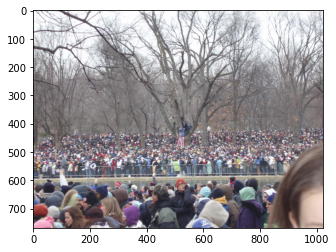

In [10]:
#now see a sample from ShanghaiA
plt.imshow(Image.open(img_paths[0]))

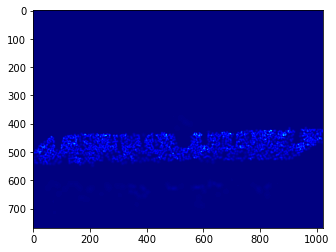

In [11]:
gt_file = h5py.File(img_paths[0].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [12]:
np.sum(groundtruth)# don't mind this slight variation

1543.841

In [13]:
#now generate the ShanghaiB's ground truth
path_sets = [part_B_train,part_B_test]

In [14]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [16]:
for img_path in img_paths:
    print (img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter(k,15)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_1.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_10.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_100.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_101.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_102.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_103.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_104.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_105.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_106.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_107.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_108.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_109.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_11.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\i

/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_200.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_201.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_202.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_203.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_204.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_205.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_206.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_207.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_208.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_209.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_21.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_210.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_211.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_dat

/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_303.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_304.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_305.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_306.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_307.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_308.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_309.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_31.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_310.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_311.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_312.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_313.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_314.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_dat

/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_45.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_46.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_47.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_48.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_49.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_5.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_50.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_51.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_52.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_53.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_54.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_55.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_56.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/train_data\images\IMG_

/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_148.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_149.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_15.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_150.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_151.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_152.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_153.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_154.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_155.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_156.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_157.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_158.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_159.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_1

/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_251.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_252.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_253.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_254.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_255.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_256.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_257.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_258.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_259.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_26.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_260.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_261.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_262.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_2

/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_70.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_71.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_72.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_73.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_74.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_75.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_76.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_77.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_78.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_79.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_8.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_80.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_81.jpg
/Users/G4400/Desktop/Shanghai/part_B_final/test_data\images\IMG_82.jpg
/Users/